<a href="https://colab.research.google.com/github/fpabi/Tareas/blob/main/Tarea_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tarea 18
##Fabiana Pavon Arce
##Prof. Lazaro Bustio
###APRENDIZAJE NO SUPERVISADO – AGRUPAMIENTO DE DATOS
Objetivo: Eres un analista de datos en una empresa de marketing y se te ha proporcionado un archivo CSV llamado “datos_clientes.csv” que contiene información sobre diferentes clientes.


In [21]:
import pandas as pd
import numpy as np
from scipy import stats

Cargar los datos desde el csv

In [22]:
csv_path ="/content/datos_clientes.csv"
clientes = pd.read_csv(csv_path)

Estadistica descriptiva de los datos del data frame

In [23]:
clientes.describe()

,Edad,Ingresos,Gasto,Puntuacion
count,483.000000,540.000000,540.000000,546.000000
mean,44.304348,29.184647,0.290031,56.780220
std,19.730459,22.064182,0.221071,45.537355
min,18.000000,1.559945,0.013863,1.000000
25%,30.000000,12.764645,0.136138,22.000000
50%,42.000000,26.888401,0.233527,49.500000
75%,56.000000,38.969482,0.403827,81.000000
max,100.000000,100.000000,1.000000,200.000000


In [26]:
# 1. Manejo de Valores Faltantes
# Identificar columnas con valores faltantes
valores_faltantes = clientes.isnull().sum()
print("Valores faltantes por columna:")
print(valores_faltantes)

# Eliminar filas con valores faltantes
clientes = clientes.dropna()

# 2. Manejo de Datos Duplicados
clientes = clientes.drop_duplicates()

# 3. Manejo de Valores Atípicos (Basado en el Z-score)
z_scores = stats.zscore(clientes[['Ingresos', 'Gasto']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
clientes = clientes[filtered_entries]


Valores faltantes por columna:
Nombre        0
Edad          0
Ingresos      0
Gasto         0
Puntuacion    0
dtype: int64


In [25]:
clientes.describe()

,Edad,Ingresos,Gasto,Puntuacion
count,104.000000,104.000000,104.000000,104.000000
mean,43.894231,27.770281,0.236710,60.807692
std,19.623603,13.513320,0.138419,50.131880
min,18.000000,1.559945,0.015898,1.000000
25%,30.250000,16.153082,0.131435,21.750000
50%,42.000000,29.743266,0.211096,51.000000
75%,54.500000,38.607783,0.353649,84.500000
max,100.000000,49.109640,0.497256,200.000000


Verifica que datos de clientes siguen las siguientes características:

i. Nombre: cadena de texto aleatoria.

ii. Edad: entero aleatorio entre 18 y 65.

iii. Ingresos: número decimal aleatorio entre 1000 y 50000

iv. Gasto: número decimal aleatorio entre 10 y 500.

v. Puntuación: entero aleatorio entre 1 y 100.

In [28]:

# Lista de columnas con números decimales
columnas_decimales = ['Ingresos', 'Gasto','Edad']

# Convertir las columnas a enteros
for columna in columnas_decimales:
    clientes[columna] = clientes[columna].astype(int)

# Define las condiciones para cada característica
condicion_nombre = clientes['Nombre'].apply(lambda x: isinstance(x, str))
condicion_edad = (clientes['Edad'] >= 18) & (clientes['Edad'] <= 65)
condicion_ingresos = (clientes['Ingresos'] >= 1000) & (clientes['Ingresos'] <= 50000)
condicion_gasto = (clientes['Gasto'] >= 10) & (clientes['Gasto'] <= 500)
condicion_puntuacion = (clientes['Puntuacion'] >= 1) & (clientes['Puntuacion'] <= 100)

# Verifica si todas las filas cumplen con las condiciones
caracteristicas_validas = condicion_nombre & condicion_edad & condicion_ingresos & condicion_gasto & condicion_puntuacion

# Imprime el resultado de la verificación
print("Verificación de Características:")
print("Todas las filas cumplen con las características:", caracteristicas_validas.all())


Verificación de Características:
Todas las filas cumplen con las características: False


Utilizar la biblioteca scikit-learn para realizar el agrupamiento utilizando HCA
y KMeans.

i. Aplicar la técnica de HCA para agrupar los clientes en 3 clusters.

ii. Aplicar el algoritmo KMeans para agrupar los clientes en 5 clusters.

iii. Realizar visualizaciones de los resultados obtenidos para cada algoritmo utilizando los gráficos correspondientes (scatterplots, dendrogramas, etc) que
muestren los grupos/clusters.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler

Agrupamiento en 3 cluters  con la técnica HCA

In [31]:
# Seleccionar las columnas numéricas para el clustering
data = clientes[['Edad', 'Ingresos', 'Gasto', 'Puntuacion']]

# Escalar los datos para KMeans
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [32]:
# 1. Aplicar HCA para agrupar en 3 clusters
hca = AgglomerativeClustering(n_clusters=3)
clientes['HCA_Cluster'] = hca.fit_predict(data_scaled)



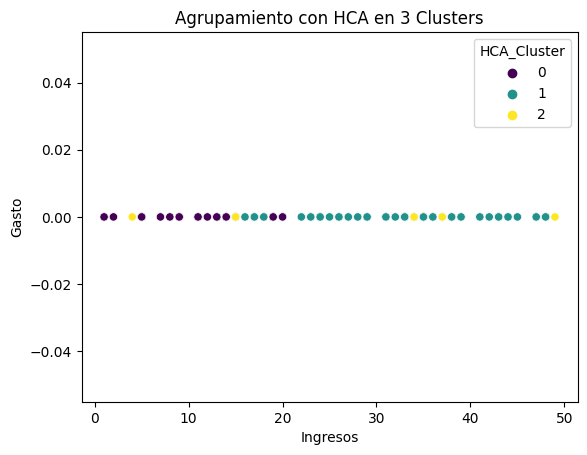

In [33]:
# 2. Visualización de los resultados
sns.scatterplot(data=clientes, x='Ingresos', y='Gasto', hue='HCA_Cluster', palette='viridis')
plt.title("Agrupamiento con HCA en 3 Clusters")
plt.show()



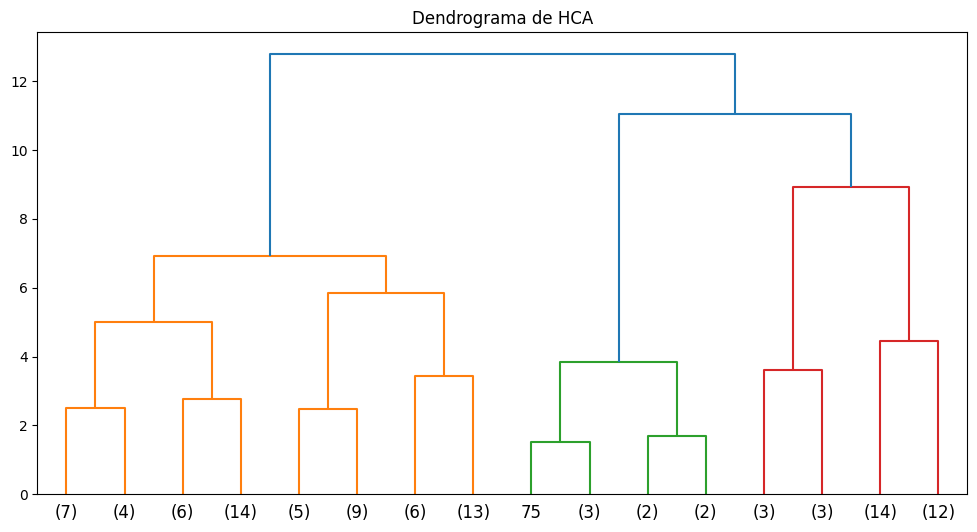

In [34]:
# 3. Dendrograma
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data_scaled)
plt.figure(figsize=(12, 6))
plt.title('Dendrograma de HCA')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.show()

Agrupamiento en 5 clusters usando KMEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


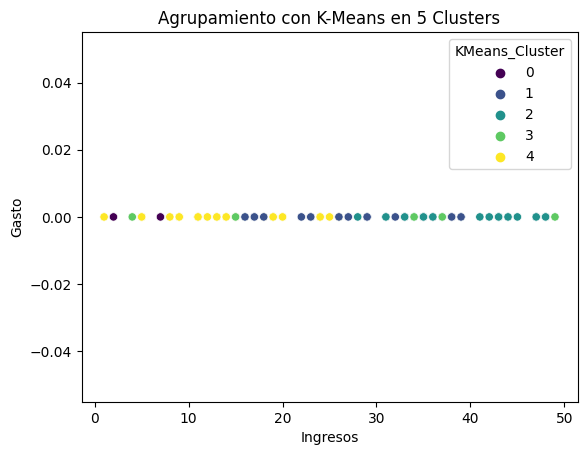

In [35]:
# 1. Aplicar KMeans para agrupar en 5 clusters
kmeans = KMeans(n_clusters=5)
clientes['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)

# 2. Visualización de los resultados
sns.scatterplot(data=clientes, x='Ingresos', y='Gasto', hue='KMeans_Cluster', palette='viridis')
plt.title("Agrupamiento con K-Means en 5 Clusters")
plt.show()
